[View in Colaboratory](https://colab.research.google.com/github/jdungan/oscn-notebooks/blob/master/criminal_justice_summit.ipynb)

# Analysis of Counts by Officers

In [23]:
# !pip uninstall -y oscn
!pip install oscn==0.0.0.20


  Using cached https://files.pythonhosted.org/packages/1c/3b/5d19b769d859a53d079a482b8731042071fe0c77e52a506e65f534419177/oscn-0.0.0.20-py3-none-any.whl


## Request and save cases from Rogers and Love 


### Step 1. Define the data to request

In [49]:
import oscn
cases = oscn.request.CaseList(county='adair', year='2017', type='CF', stop=50)


### Step 2.  Request and save the cases


In [50]:
import pickle

all_cases = [c for c in cases]
f = open(f'CF.adair.2017.pckl', 'wb')
pickle.dump(all_cases, f)
f.close()
!ls

CF-2017-1
CF-2017-2
CF-2017-3
CF-2017-4
CF-2017-5
CF-2017-6
CF-2017-7
CF-2017-8
CF-2017-9
CF-2017-10
CF-2017-11
CF-2017-12
CF-2017-13
CF-2017-14
CF-2017-15
CF-2017-16
CF-2017-17
CF-2017-18
CF-2017-19
CF-2017-20
CF-2017-21
CF-2017-22
CF-2017-23
CF-2017-24
CF-2017-25
CF-2017-26
CF-2017-27
CF-2017-28
CF-2017-29
CF-2017-30
CF-2017-31
CF-2017-32
CF-2017-33
CF-2017-34
CF-2017-35
CF-2017-36
CF-2017-37
CF-2017-38
CF-2017-39
CF-2017-40
CF-2017-41
CF-2017-42
CF-2017-43
CF-2017-44
CF-2017-45
CF-2017-46
CF-2017-47
CF-2017-48
CF-2017-49
CF-2017-50
CF.adair.2017.pckl                criminal_justice_summit.ipynb
CF.harper.2017.pckl               data
README.md                         delaware_county_pro_se.ipynb
Searching_count_description.ipynb officers_and_counts.ipynb
arresting_agency-Copy1.ipynb      oscn_example.ipynb
arresting_agency.ipynb


### Step 2.  Retrieve the data from saved files

In [51]:


import pickle


saved_cases = []
case_count =0 
file_name = f'CF.adair.2017.pckl'
print(file_name)
new_cases = pickle.load(open(file_name, 'rb'))
new_case_count = len(new_cases)
case_count += new_case_count
print(f' added {new_case_count}')
saved_cases += new_cases
        
print(f'counted case: {case_count} length saved {len(saved_cases)}')


CF.adair.2017.pckl
 added 50
counted case: 50 length saved 50


### Step 3.  Load the data for analysis
This takes about 8 minutes

In [52]:
import numpy as np

import pandas as pd


columns = ['Year','County','Type','Agency','Case Number', 'Count']



def agency(case):
  agency_desc = 'ARRESTING AGENCY'
  for p in case.parties:
    if agency_desc in p['type']:
      return p['name']
  return 'UNKNOWN'

  
count_data = lambda c, desc: [c.year, c.county, c.type, agency(c), c.case_number, desc ]

panda_data = []
for case in saved_cases:
    for count in case.counts:
#         print(count['description'])
        panda_data.append(count_data(case, count['description']))

%time df = pd.DataFrame(panda_data, columns = columns)

CPU times: user 1.08 ms, sys: 181 µs, total: 1.26 ms
Wall time: 1.27 ms


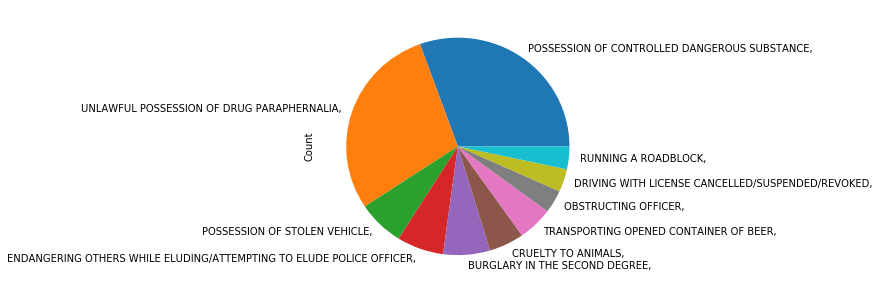

In [53]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt



df['Year'].value_counts()
# df['Type'].value_counts()
# df['Agency'].value_counts()
# df.filter(like='LIGHTHORSE',axis=0)
# qf = df.query("Type == 'CF'")

top_ten = df['Count'].value_counts().head(10)


top_ten.plot.pie(y='Count', figsize=(5, 5))
